<a href="https://colab.research.google.com/github/MEK-0/Artificial-Neural-Networks-ANN-/blob/main/ANN_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##KÜTÜPHANELERİ EKLEME

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


##VERİ SETİ KISMI

In [4]:
# MNIST veri setini yükle
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Veriyi normalize et (0-255 arası piksel değerlerini 0-1 arası ölçeğe çekiyoruz)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Etiketleri one-hot encode yap
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


##GÖRÜNTÜ TEST ETME

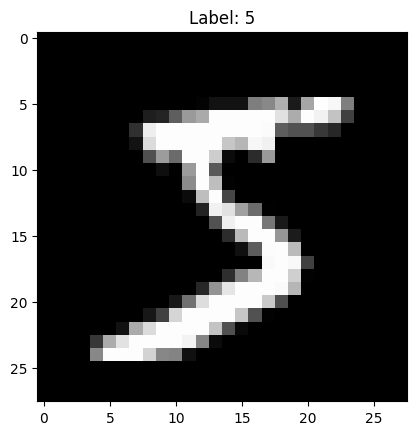

In [5]:
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {np.argmax(y_train[0])}")
plt.show()

##MODEL İŞLEM KISMI

In [6]:
# Modeli oluştur
model = Sequential([
    Flatten(input_shape=(28, 28)),  # 28x28'lik görüntüyü düzleştir
    Dense(128, activation='relu'), # 128 nöronlu gizli katman
    Dense(10, activation='softmax') # Çıkış katmanı (10 sınıf)
])

# Modeli derle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


##MODEL EĞİTİMİ

In [8]:
# Modeli eğitimi (ortalama 40 saniye)
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9889 - loss: 0.0385 - val_accuracy: 0.9735 - val_loss: 0.0918
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9916 - loss: 0.0292 - val_accuracy: 0.9753 - val_loss: 0.0852
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9934 - loss: 0.0234 - val_accuracy: 0.9747 - val_loss: 0.0893
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9951 - loss: 0.0185 - val_accuracy: 0.9767 - val_loss: 0.0845
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9957 - loss: 0.0150 - val_accuracy: 0.9745 - val_loss: 0.0921


In [9]:
# Modeli test seti üzerinde değerlendir
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.2f}")


313/313 - 1s - 2ms/step - accuracy: 0.9765 - loss: 0.0843
Test Accuracy: 0.98


##ÇIKIŞ TEST KISMI

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


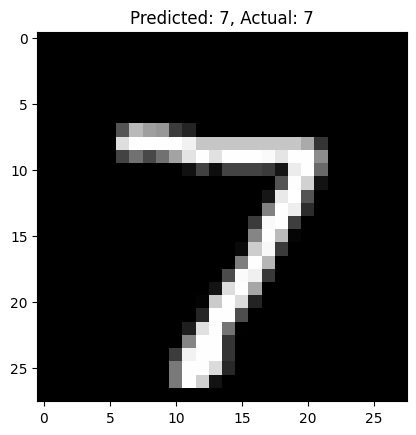

In [11]:
# Test setinden bir örneği tahmin et
predictions = model.predict(x_test)
predicted_label = np.argmax(predictions[0])
actual_label = np.argmax(y_test[0])

# Sonuçları görselleştir
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
plt.show()
